<h2 style="text-align: center;"><b>Домашнее задание 3. Математика для DS.
</b></h2>

В этом домашнем задании мы вспомним немного математики и закрепим PCA.


In [1]:
import numpy as np
import scipy as sp
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Задание 1

1 балл

Посчитайте производную $f(x)=x^x$ в точке $x_0 = e$

Тут надо действовать хитро. По определению взять не получится.

Ответ округлите до десятых.

**Ответ:**

**1-й способ:**

Обозначим $f(x) = y$

$$y = x^x$$

Возьмём натуральный логарифм от правой и левой части:

$$\ln y = \ln x^x$$

$$\ln y = x \ln x$$

Продифференцируем правую и левую часть:

$$(\ln y)' = (x \ln x)'$$

$$\frac {y'}{y} = \ln x + \frac {x}{x}$$

$$y' = y (\ln x + 1) \text{, где }y = x^x => y' = x^x (\ln x + 1)$$

$$\text{Так как }y = f(x) \text{, то } f'(x) = x^x (\ln x + 1)$$


---


**2-й способ:**

$$f(x) = x^x = e^{\ln x^x} = e^{x \ln x}$$

$$f'(x) = e^{x \ln x} (\ln x + x \cdot \frac{1}{x}) = x^x (\ln x + 1)$$


---


Производная функции $f(x)$ в точке $x_0 = e$ равна:

$$f'(e) = e^e (\ln e + 1) = 2 e^e \approx 30.3$$

In [2]:
round(2 * (np.e ** np.e), 1)

30.3

In [3]:
#Вариант нахождения производной через библиотеку sympy
from sympy import symbols, diff, lambdify
from IPython.display import display
x = symbols('x')
expr =  x**x
dx = diff(expr, x)
display(dx)
fdx = lambdify(x, dx)
print(round(fdx(np.e),1))

x**x*(log(x) + 1)

30.3


In [4]:
#Вариант нахождение производной по определению
def XpowX(x):
    return x**x


delta = 1e-10
der = (XpowX(np.e + delta) - XpowX(np.e))/delta

print(round(der, 1))

30.3


## Задание 2

2 балла

Вычислите производную $f(x)=tg(x)⋅ln(cos(x^2)+1)$, в точке $x_0 = 0$

**Ответ:**

$$f'(x) = (tg(x))' \cdot ln(cos(x^2) + 1) + tg(x) \cdot (ln(cos(x^2) + 1))' = \\ = \frac {1}{cos^2 (x)} \cdot ln(cos(x^2) + 1) + tg(x) \cdot 2x \cdot (-sin(x^2)) \cdot \frac {1} {cos(x^2) + 1}$$

Производная функции $f(x)$ в точке $x_0 = 0$ равна:

$$f'(0) = \frac {1}{cos^2 (0)} \cdot ln(cos(0^2) + 1) + tg(0) \cdot 2 \cdot 0 \cdot (-sin(0^2)) \cdot \frac {1} {cos(0^2) + 1} = ln 2$$ 

## Задание 3 ##

3 балла

Предположим, у вас есть функция, и вы бы хотели знать ее производную, но у вас нет аналитического выражения для нее.
Ваше задание --- написать функцию, которая будет вычислять производную ... кхм функции. Тавтология --- это не очень приятно, но я думаю, что Вы поняли что нужно делать.
Однако не подумайте, что вас просят написать что-то, что будет вычислять эту самую производную аналитически.
Попробуйте это сделать приближенно, опираясь на определение производной.

__Напоминание:__
Если вдруг вы не помните определение производной, то вот оно:

$$\lim_{h→0}\frac{f(x+h)−f(x)}{h}$$
Или, что то же:
$$\lim_{x→x_0}\frac{f(x)−f(x_0)}{x-x_0}$$

Если такой предел существует, то и производная существует (и равна этому пределу).

In [5]:
def numerical_derivative_1d(func, epsilon):
    """
    Функция для приближённого вычисления производной функции одной переменной. 
    :param func: float -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по оси Ох
    :return: другая функция, которая приближённо вычисляет производную в точке
    """
    def deriv_func(x):
        """
        :param x: float — точка, в которой нужно вычислить производную
        :return: приближённое значение производной в этой точке
        """
        return (func(x + epsilon) - func(x))/epsilon
    return deriv_func

In [6]:
# Проверьте себя!
def polynom_to_prime(x):
    return 20 * x**5 + x**3 - 5 * x**2 + 2 * x + 2.0


def primed_poly(x):
    return 100 * x**4 + 3 * x**2 -10 * x + 2.0


approx_deriv = numerical_derivative_1d(polynom_to_prime, 1e-5)

grid = np.linspace(-2, 2, 100)
right_flag = True
tol = 0.05
debug_print = []

for x in grid:
    estimation_error = abs(primed_poly(x) - approx_deriv(x)) 
    if estimation_error > tol:
        debug_print.append((estimation_error, primed_poly(x), approx_deriv(x)))
        right_flag = False

if not right_flag:
    print("Что-то не то...")
    print(debug_print)
    plt.plot(grid, primed_poly(grid), label="Истинная производная")
    plt.plot(grid, approx_deriv(grid), label="Численное приближение")
    plt.legend()

print(str(right_flag))

True


# Задание 4 - сжатие звука

Σ 12 баллов за все подпункты

Помните как на лекции мы сжимали картинки с помощью PCA? Теперь вам предлагается сделать тоже самое, но со звуком!

In [7]:
# понадобится для чтения и записи аудио файлов
from scipy.io import wavfile

# это нужно для проигрывания аудио файлов прямо в колабе
from IPython.display import Audio

Считаем wav файл и посмотрим его содержимое

In [8]:
#from google.colab import drive 
#drive.mount('/content/gdrive')

In [9]:
# ссылка для скачивания файла с гугл диска https://drive.google.com/file/d/1WmORZGngnOn2tMzyAEQOu1gps0ZxsgpB/view?usp=sharing

# Вставьте свой путь к файлу в строчке ниже
#samplerate, data = wavfile.read('gdrive/MyDrive/SberUni/Main/BigHW/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav')
! wget -O audio.wav 'https://drive.google.com/u/0/uc?id=16ptP3KhUCUkeAoG6hkW6TvnoDSU0dI90&export=download' > /dev/null
samplerate, data = wavfile.read('audio.wav')

--2022-01-11 19:11:16--  https://drive.google.com/u/0/uc?id=16ptP3KhUCUkeAoG6hkW6TvnoDSU0dI90&export=download
Resolving drive.google.com (drive.google.com)... 172.217.203.113, 172.217.203.102, 172.217.203.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l3la6018cg1pidgiual4oeavktbq3lmr/1641928275000/17557264658931665069/*/16ptP3KhUCUkeAoG6hkW6TvnoDSU0dI90?e=download [following]
--2022-01-11 19:11:17--  https://doc-10-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l3la6018cg1pidgiual4oeavktbq3lmr/1641928275000/17557264658931665069/*/16ptP3KhUCUkeAoG6hkW6TvnoDSU0dI90?e=download
Resolving doc-10-8s-docs.googleusercontent.com (doc-10-8s-docs.googleusercontent.com)... 173.194.218.132, 2607:f8b0:400c:c14::84
Connecting to doc-10-8s-docs.googleusercontent.co

Выведем частоту дискретизации - она тут стандартная для аудио: 44100 герца

Она говорит о том, сколько последовательных элементов массива с сигналом кодируют звук длительностью 1 секунда.

Подробнее о кодировании звука читайте тут: https://ru.wikipedia.org/wiki/Кодирование_звуковой_информации

In [10]:
samplerate

44100

Соответсвенно, если поделить длину массива сигнала на samplerate, получится длительность аудиодорожки в секундах

In [11]:
# 45 секунд - похоже на правду)
len(data)/samplerate

45.139591836734695

Заметим, что звук - стерео, так как сигнал кодируется двумя каналами (для левого и правого динамика):

In [12]:
data.shape

(1990656, 2)

Выведем сигналы в обоих каналах

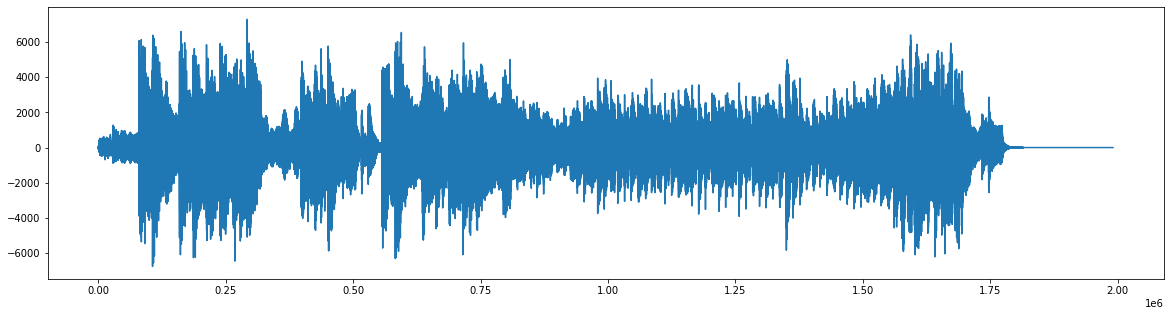

In [13]:
# Канал 1
plt.figure(figsize=(20,5))
plt.plot(data[:,0])
plt.show()


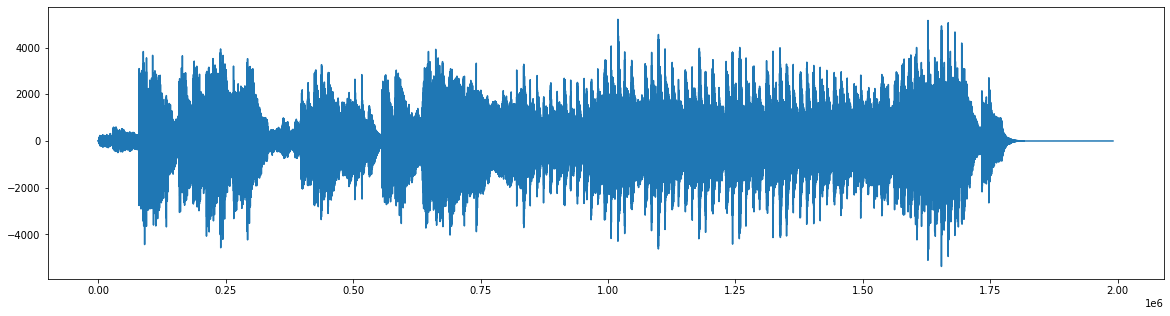

In [14]:
# Канал 2
plt.figure(figsize=(20,5))
plt.plot(data[:,1])
plt.show()

Усредним каналы, и получим моно звук, с которым будет проще работать

In [15]:
mono_sound = np.mean(data, axis=1)
print(mono_sound.shape)

(1990656,)


Давайте послушаем наконец, что же мы будем сжимать

In [16]:
Audio(mono_sound, rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

Для удобства - обрежем массив с сигналом так, чтобы его было удобнее делить на равные части, датасет из которых и необходимо будет сжать известными вам методами. На самом деле способ очень похож на тот, которым мы сжимали картинку, деля её на прямоугольные подкартинки)

In [17]:
mono_sound_to_cut = mono_sound[:1990000]
len(mono_sound_to_cut)

1990000

## Задание 4.1

3 балла

1) Разделите сигнал на равные части - размер частей выбирайте на ваше усмотрение. Рекомендуется 500 или 1000

2) Соберите из них "датасет", который будет представим в виде двуменого массива - "матрицы"

3) Сразу напишите функцию, которая будет переводить вашу "матрицу" обратно в звуковой сигнал. Проверьте что все работает, путем воспроизведения востановленного сигнала.

In [18]:
def array_to_dataset(ar, part_size):
  return ar.reshape(part_size, len(ar)//part_size)

mono_sound_to_cut_dataset = array_to_dataset(mono_sound_to_cut, 1000)
mono_sound_to_cut_dataset, mono_sound_to_cut_dataset.shape

(array([[  0. ,  -1. ,  -1. , ..., 158.5, 193.5, 236.5],
        [276.5, 302. , 301.5, ...,  44.5,  36. ,  40.5],
        [ 58.5,  79.5,  84.5, ..., -15. , -51.5, -62.5],
        ...,
        [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
        [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
        [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]]), (1000, 1990))

In [19]:
def dataset_to_array(ar):
  return ar.flatten()

Audio(dataset_to_array(mono_sound_to_cut_dataset), rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

## Задание 4.2

3 балла

1) Выполните PCA преобразование, и получите данные, сжатые в пространство меньшей размерности  

2) Постройте сами главные компоненты в наглядной форме. Сделайте выводы исходя из их вида.

3) Постройте scatter plot датасета в просрансве первых двух компонент, а третью используйте как цвет


In [20]:
import scipy as sp
from sklearn.decomposition import PCA

In [21]:
pca1 = PCA(n_components=10)
mono_sound_to_cut_dataset_pca = pca1.fit_transform(mono_sound_to_cut_dataset)
mono_sound_to_cut_dataset_pca

array([[  20.07192531,   63.34604811,  113.5773432 , ...,  101.14172985,
         -20.1211471 ,   -4.39883912],
       [-181.49643262,  -29.91641844,  382.88886033, ...,  -78.97293783,
          21.02863403,   62.74472589],
       [ -92.61825203,  -48.09928861, -129.36980067, ..., -295.56945809,
         341.19709235,  -34.10853141],
       ...,
       [  34.88893543,  -12.22683444,  -39.11058772, ...,  -28.18097687,
         -62.17550221,  -16.1713996 ],
       [  34.88893543,  -12.22683444,  -39.11058772, ...,  -28.18097687,
         -62.17550221,  -16.1713996 ],
       [  34.88893543,  -12.22683444,  -39.11058772, ...,  -28.18097687,
         -62.17550221,  -16.1713996 ]])

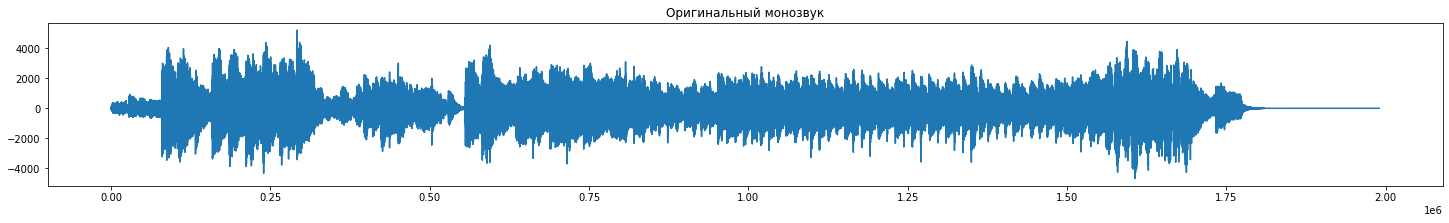

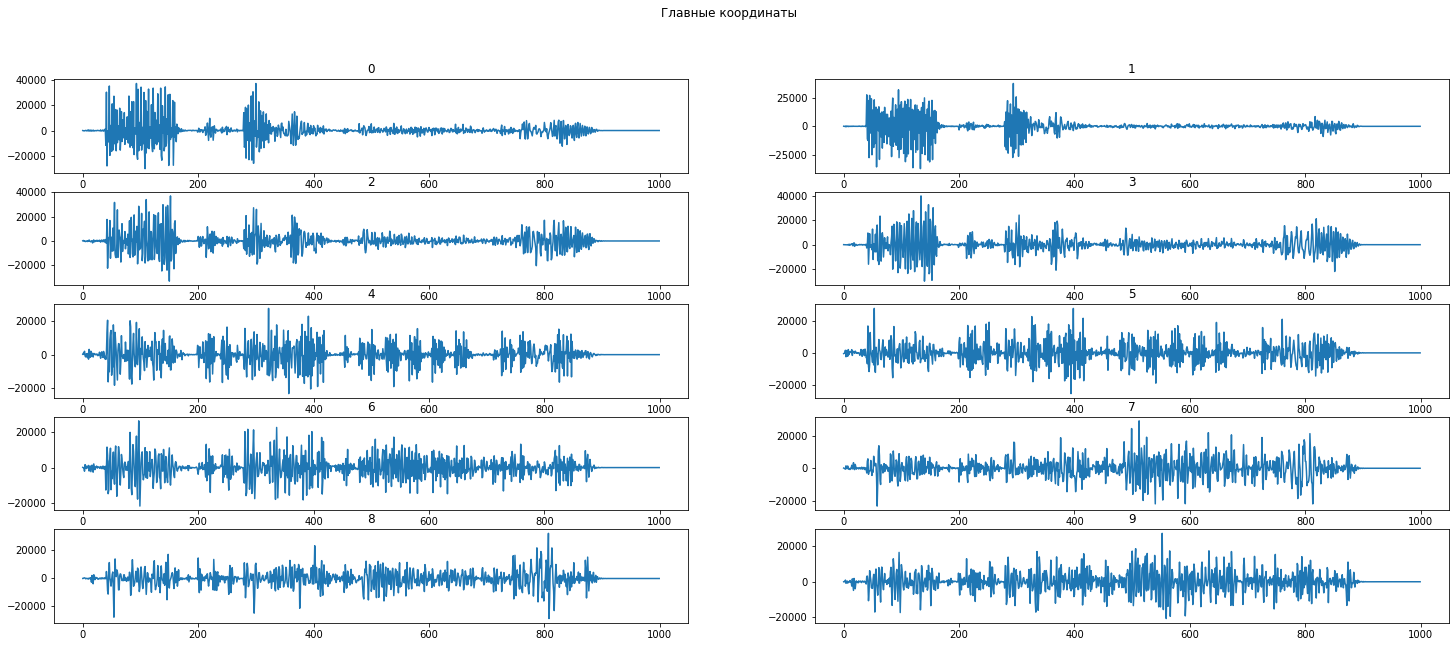

In [22]:
#plt.figure(figsize=(20,10))
plt.figure(figsize=(25,3))
plt.plot(mono_sound_to_cut)
plt.title("Оригинальный монозвук")
#plt.show()

fig, ax = plt.subplots(5, 2, figsize=(25, 10))
fig.suptitle("Главные координаты")
i = 0
for row in ax:
    for col in row:
        col.set_title(i)
        col.plot(mono_sound_to_cut_dataset_pca[:, i], label=i)
        i = i + 1
plt.show()

**Вывод:**

С увеличением координаты, "звук" становится появляется дополнительный шум.

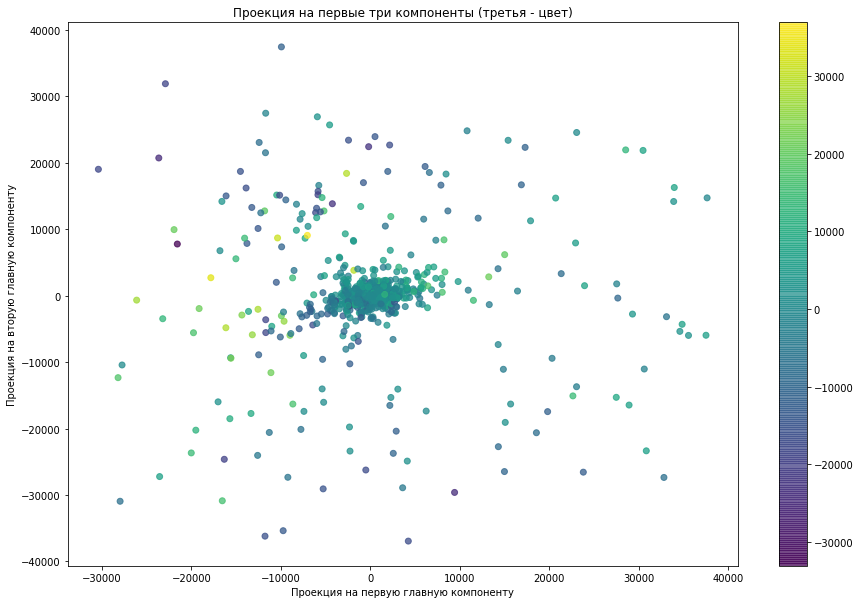

In [23]:
pca2 = PCA(n_components=3)
mono_sound_to_cut_dataset_pca_3c = pca2.fit_transform(mono_sound_to_cut_dataset)

plt.figure(figsize=(15,10))
plt.scatter(
    mono_sound_to_cut_dataset_pca_3c[:, 0],
    mono_sound_to_cut_dataset_pca_3c[:, 1],
    c=mono_sound_to_cut_dataset_pca_3c[:, 2],
    alpha=0.75,
    )
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.title('Проекция на первые три компоненты (третья - цвет)')
plt.colorbar()
plt.show()

**Вывод:**

Большинство координат располагаются в квадрате: по абсциссе между [-10000, 10000], по ординате между [-10000, 10000].

Прослеживается "кучкование" около нуля.

## Задание 4.3

2 балла

1) Выполните обратное PCA преобразование сжатыз данных и получите "матрицу" с сжатым звуком

2) Преобразуйте "матрицу" в сигнал (одномерный массив), и послушайте результат

In [24]:
pca3 = PCA(n_components=50)
mono_sound_to_cut_dataset_pca_50c = pca3.fit_transform(mono_sound_to_cut_dataset)
mono_sound_compressed = dataset_to_array(pca3.inverse_transform(mono_sound_to_cut_dataset_pca_50c))
mono_sound_compressed

array([ 15.14900495,  20.09701252,  22.48022258, ..., -14.90337549,
       -12.67090424, -10.76803457])

In [25]:
#Сжатый
from scipy.ndimage import gaussian_filter1d 
Audio(gaussian_filter1d(mono_sound_compressed, 2), rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

In [26]:
#Оригинальный звук
Audio(dataset_to_array(mono_sound_to_cut_dataset), rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

Подсказка! попробуйте отфильтровать сигнал с помощью функции gaussian_filter1d из scipy.ndimage. Это поможет убрать неприятный дробовой шум при сильном сжатии

Пример кода для фильтрации - Audio(gaussian_filter1d(mono_sound_compressed, 2), rate = samplerate)

## Задание 4.4

4 балла

1) Оберните получившийся код по сжатию звука в одну или несколько функций

2) Проведите исследование того, как степень сжатия (соотношения размера частей, на которые делился сигнал в п. 4.1 к размеру пространсва, в которое вы сжимали данные с помощью PCA) влияет на звук, по субъективным ощущениям. Начиная с какой степени сжания сильно слышится потеря качества? (как с учетом фильтрации с помощью gaussian_filter1d, так и без неё)

In [27]:
import IPython.display as dis

def mono_sound_compressed_func(mono_sound, part_len=1000, n_components=50, gaussian=True):
    sound_array = array_to_dataset(mono_sound, part_len)

    pca4 = PCA(n_components=n_components)
    after_pca = pca4.fit_transform(sound_array)
    mono_sound_compressed = dataset_to_array(pca4.inverse_transform(after_pca))
    
    if gaussian:
        print("Размер частей {}, количество главных компонент {}, с фильтрацией сигнала".format(part_len, n_components))
        dis.display(dis.Audio(gaussian_filter1d(mono_sound_compressed, 2), rate = samplerate))
    else:
        print("Размер частей {}, количество главных компонент {}, без фильтрации сигнала".format(part_len, n_components))
        dis.display(dis.Audio(dataset_to_array(mono_sound_compressed), rate = samplerate))

In [28]:
parts = [100, 500, 2000, 10000]
n_compons = [1, 5]

for p in parts:
    for n in n_compons:
        if (n > p) or (n > len(mono_sound_to_cut)/p):
            continue
        else:
            mono_sound_compressed_func(mono_sound_to_cut, part_len=p, n_components=n, gaussian=True)

Output hidden; open in https://colab.research.google.com to view.

In [29]:
parts = [100, 500, 2000, 10000]
n_compons = [1, 5]

for p in parts:
    for n in n_compons:
        if (n > p) or (n > len(mono_sound_to_cut)/p):
            continue
        else:
            mono_sound_compressed_func(mono_sound_to_cut, part_len=p, n_components=n, gaussian=False)

Output hidden; open in https://colab.research.google.com to view.

In [30]:
parts = [100, 500, 2000, 10000]
n_compons = [10, 20]

for p in parts:
    for n in n_compons:
        if (n > p) or (n > len(mono_sound_to_cut)/p):
            continue
        else:
            mono_sound_compressed_func(mono_sound_to_cut, part_len=p, n_components=n, gaussian=True)

Output hidden; open in https://colab.research.google.com to view.

In [31]:
parts = [100, 500, 2000, 10000]
n_compons = [10, 20]

for p in parts:
    for n in n_compons:
        if (n > p) or (n > len(mono_sound_to_cut)/p):
            continue
        else:
            mono_sound_compressed_func(mono_sound_to_cut, part_len=p, n_components=n, gaussian=False)

Output hidden; open in https://colab.research.google.com to view.

In [32]:
parts = [100, 500, 2000, 10000]
n_compons = [50, 100]

for p in parts:
    for n in n_compons:
        if (n > p) or (n > len(mono_sound_to_cut)/p):
            continue
        else:
            mono_sound_compressed_func(mono_sound_to_cut, part_len=p, n_components=n, gaussian=True)

Output hidden; open in https://colab.research.google.com to view.

In [33]:
parts = [100, 500, 2000, 10000]
n_compons = [50, 100]

for p in parts:
    for n in n_compons:
        if (n > p) or (n > len(mono_sound_to_cut)/p):
            continue
        else:
            mono_sound_compressed_func(mono_sound_to_cut, part_len=p, n_components=n, gaussian=False)

Output hidden; open in https://colab.research.google.com to view.

In [36]:
parts = [100, 500, 2000, 10000]
n_compons = [200, 500]

for p in parts:
    for n in n_compons:
        if (n > p) or (n > len(mono_sound_to_cut)/p):
            continue
        else:
            mono_sound_compressed_func(mono_sound_to_cut, part_len=p, n_components=n, gaussian=True)

Output hidden; open in https://colab.research.google.com to view.

In [37]:
parts = [100, 500, 2000, 10000]
n_compons = [200, 500]

for p in parts:
    for n in n_compons:
        if (n > p) or (n > len(mono_sound_to_cut)/p):
            continue
        else:
            mono_sound_compressed_func(mono_sound_to_cut, part_len=p, n_components=n, gaussian=False)

Output hidden; open in https://colab.research.google.com to view.

**Вывод (по субъективным ощущениям):**

Среди исследованных значений, минимальный размер частей и количество главных компонент, при которых отдалённо, но можно распознать музыку, равны соответственно 100 и 5 (с фильтрацией сигнала и без).

Среди исследованных значений, минимальный размер частей и количество главных компонент, при которых сжатый звук не отличается от оригинального, равны соответственно 100 и 100 (с фильтрацией сигнала и без).